In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math

In [2]:
# loading the data
apple_data = np.load('./apple.npy')
bread_data = np.load('./bread.npy')
broccoli_data = np.load('./broccoli.npy')
sandwich_data = np.load('./sandwich.npy')

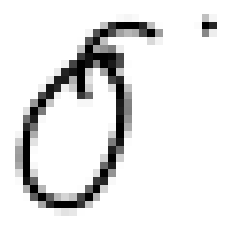

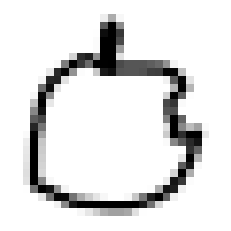

In [3]:
# understanding the data
def print_data(data):
    for line in data:
        print(line)
        print('----------------')

# cleaner printing
def print_drawing(drawing):
    plt.imshow(drawing.reshape((28,28)), cmap='Greys')
    plt.axis('off')
    plt.show()

for drawing in apple_data[:2]:
    print_drawing(drawing)


In [4]:
# randomizing the data
np.random.shuffle(apple_data)
np.random.shuffle(bread_data)
np.random.shuffle(broccoli_data)
np.random.shuffle(sandwich_data)

# splitting into test and train
train_percent = 0.8

apple_cutoff = math.floor(len(apple_data) * train_percent)
apple_trainX = apple_data[:apple_cutoff]
apple_trainY = np.tile([1,0,0,0], (len(apple_trainX),1))
apple_testX = apple_data[apple_cutoff:]
apple_testY = np.tile([1,0,0,0], (len(apple_testX),1))

bread_cutoff = math.floor(len(bread_data) * train_percent)
bread_trainX = bread_data[:bread_cutoff]
bread_trainY = np.tile([0,1,0,0], (len(bread_trainX),1))
bread_testX = bread_data[bread_cutoff:]
bread_testY = np.tile([0,1,0,0], (len(bread_testX),1))

broccoli_cutoff = math.floor(len(broccoli_data) * train_percent)
broccoli_trainX = broccoli_data[:broccoli_cutoff]
broccoli_trainY = np.tile([0,0,1,0], (len(broccoli_trainX),1))
broccoli_testX = broccoli_data[broccoli_cutoff:]
broccoli_testY = np.tile([0,0,1,0], (len(broccoli_testX),1))

sandwich_cutoff = math.floor(len(sandwich_data) * train_percent)
sandwich_trainX = sandwich_data[:sandwich_cutoff]
sandwich_trainY = np.tile([0,0,0,1], (len(sandwich_trainX),1))
sandwich_testX = sandwich_data[sandwich_cutoff:]
sandwich_testY = np.tile([0,0,0,1], (len(sandwich_testX),1))

# building the training and testing arrays
X_train = np.concatenate((apple_trainX, bread_trainX, broccoli_trainX, sandwich_trainX))
Y_train = np.concatenate((apple_trainY, bread_trainY, broccoli_trainY, sandwich_trainY))
X_test = np.concatenate((apple_testX, bread_testX, broccoli_testX, sandwich_testX))
Y_test = np.concatenate((apple_testY, bread_testY, broccoli_testY, sandwich_testY))

In [5]:
# normalize the X data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
# building out the model
model = keras.models.Sequential()

# adding the first hidden layer
model.add(layers.Dense(512, input_shape=(784,)))
model.add(layers.Activation('relu'))                            
model.add(layers.Dropout(0.2))

# adding the second hidden layer
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

# adding the output layer
model.add(layers.Dense(4))
model.add(layers.Activation('softmax'))

In [7]:
# compiling the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [8]:
# training the model
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 423878 samples, validate on 105972 samples
Epoch 1/20
423878/423878 - 45s - loss: 0.2142 - accuracy: 0.9298 - val_loss: 0.1652 - val_accuracy: 0.9448
Epoch 2/20
423878/423878 - 33s - loss: 0.1653 - accuracy: 0.9456 - val_loss: 0.1494 - val_accuracy: 0.9492
Epoch 3/20
423878/423878 - 32s - loss: 0.1494 - accuracy: 0.9503 - val_loss: 0.1470 - val_accuracy: 0.9497
Epoch 4/20
423878/423878 - 33s - loss: 0.1375 - accuracy: 0.9539 - val_loss: 0.1423 - val_accuracy: 0.9520
Epoch 5/20
423878/423878 - 32s - loss: 0.1284 - accuracy: 0.9567 - val_loss: 0.1406 - val_accuracy: 0.9528
Epoch 6/20
423878/423878 - 33s - loss: 0.1207 - accuracy: 0.9590 - val_loss: 0.1404 - val_accuracy: 0.9534
Epoch 7/20
423878/423878 - 34s - loss: 0.1142 - accuracy: 0.9608 - val_loss: 0.1406 - val_accuracy: 0.9532
Epoch 8/20


KeyboardInterrupt: 